In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("student-mat.csv",delimiter=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data = data[['G1','G2','G3']]
traing_data = data[0:340]
test_data = data[340:]
print(traing_data.shape,test_data.shape)

(340, 3) (55, 3)


In [4]:
x1 = traing_data.G1
x2 = traing_data.G2
y = traing_data.G3

Text(0.5, 0, 'G1')

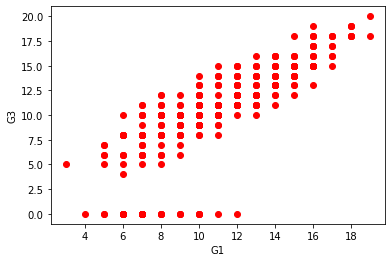

In [5]:
plt.plot(x1, y,'ro')
plt.ylabel('G3')
plt.xlabel('G1')

Text(0.5, 0, 'G2')

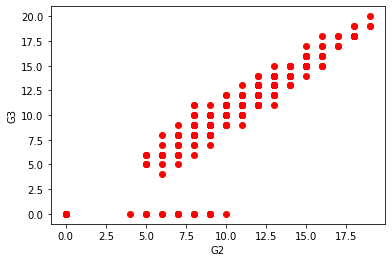

In [6]:
plt.plot(x2, y,'ro')
plt.ylabel('G3')
plt.xlabel('G2')

In [7]:
x1_mean = x1.mean()
x2_mean = x2.mean()
y_mean = y.mean()
print(x1_mean,x2_mean,y_mean)

10.908823529411764 10.75 10.50294117647059


In [8]:
df = pd.DataFrame()
df["x1"] = x1
df["y"] = y
df["x1_min"] = x1 - x1_mean
df["y_min"] = y - y_mean
df["x1_min_squre"] = df.x1_min * df.x1_min
df["y_min"] = df.y - y_mean
df["x1_min_X_y_min"] = df.x1_min * df.y_min
df

,x1,y,x1_min,y_min,x1_min_squre,x1_min_X_y_min
0,5,6,-5.908824,-4.502941,34.914196,26.607085
1,5,6,-5.908824,-4.502941,34.914196,26.607085
2,7,10,-3.908824,-0.502941,15.278901,1.965908
3,15,15,4.091176,4.497059,16.737725,18.398261
4,6,10,-4.908824,-0.502941,24.096548,2.468849
...,...,...,...,...,...,...
335,16,15,5.091176,4.497059,25.920078,22.895320
336,14,13,3.091176,2.497059,9.555372,7.718849
337,7,0,-3.908824,-10.502941,15.278901,41.054144
338,16,17,5.091176,6.497059,25.920078,33.077673


In [9]:
m = df.x1_min_X_y_min.sum() / df.x1_min_squre.sum()
m

1.0996285452696306

In [10]:
c = y_mean - (m*x1_mean)
c

-1.4927125717795864

In [11]:
t = test_data.G1
ans = m*t + c 
df2 = pd.DataFrame()
df2["y"] = test_data.G3
df2["y_pridict"] = ans
df2["err"] = df2.y - df2.y_pridict
df2.mean()

y             9.872727
y_pridict    10.503235
err          -0.630508
dtype: float64

In [12]:
#